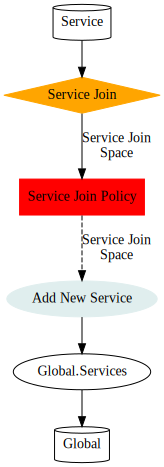

In [1]:
import os
import sys
sys.path.append("..")

from MSML.src import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz,
                      write_basic_report_full, write_action_chain_reports, write_spec_tree,
                      create_parameter_impact_table, write_entity_reports)
from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
ms = load_from_json(deepcopy(math_spec_json))

for behavior in ["Service Join"]:
    display(create_action_chains_graph(ms, [behavior], behavior))

## Spec Tree

In [2]:
print(write_spec_tree(ms))

├──Entities
│   ├──Servicer
│   ├──Fisherman
│   ├──Application
│   ├──Validator
│   ├──Portal
│   ├──Treasury
│   ├──Service
│   ├──Global
│   ├──DAO
├──State
│   ├──Global
│   │   ├──Services
│   │   ├──Sessions
│   ├──Servicer
│   │   ├──Public key
│   │   ├──Servicer Salary
│   │   ├──Report Card
│   │   ├──Test Scores
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Service URL
│   │   ├──Services
│   │   ├──GeoZone
│   │   ├──Operator Public Key
│   │   ├──Pause Height
│   │   ├──Stake Status
│   │   ├──Unstaking Height
│   ├──Fisherman
│   │   ├──Stake Status
│   ├──Application
│   │   ├──Public key
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Services
│   │   ├──GeoZone
│   │   ├──Number of Servicers
│   │   ├──Stake Status
│   │   ├──Unstaking Height
│   ├──Validator
│   │   ├──Public key
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Service URL
│   │   ├──Operator Public Key
│   │   ├──Stake Status
│   ├──Portal
│   │   ├──Stake Status
│  

## Parameter Impacts

- Parameter links shows just direct impact, parameter links exploded shows indirect upstream and downstream impacts.

- Blocks orientation shows what parameters are associated with blocks, parameters orientation shows the impacts of parameters on blocks. Information is the same though, just a different view.

In [3]:
print("Parameter Links, Parameters View")
print(create_parameter_impact_table(ms.param_links, orientation="Parameters"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links Exploded, Parameters View")
print(create_parameter_impact_table(ms.param_links_exploded, orientation="Parameters"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links, Blocks View")
print(create_parameter_impact_table(ms.param_links, orientation="Blocks"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links Exploded, Blocks View")
print(create_parameter_impact_table(ms.param_links_exploded, orientation="Blocks"))

Parameter Links, Parameters View
                                      Boundary Actions  \
minimum_stake_servicer                              []   
minimum_stake_period_servicer                       []   
minimum_pause_time                                  []   
max_chains_servicer                                 []   
salary_block_frequency                              []   
minimum_test_score_threshold                        []   
minimum_report_card_threshold                       []   
servicer_unbounding_period                          []   
relays_to_tokens_multiplier                         []   
slash_fraction_downtime                             []   
replay_attack_burn_multiplier                       []   
max_jailed_blocks                                   []   
downtime_jail_duration                   [Unjail Node]   
minimum_servicers_per_session                       []   
maximum_servicers_per_session                       []   
application_unstaking_time             

In [4]:
write_action_chain_reports(ms, "reports/actions", ["Servicer Stake", "Application Stake", "Servicer Pause", "Mint Block Rewards",
                                                  "Application Unstake", "Servicer Unstake"])
write_entity_reports(ms, "reports/entities", ['Servicer',
 'Fisherman',
 'Application',
 'Validator',
 'Portal',
 'Treasury',
 'Service',
 'Global',
 'DAO'])
write_basic_report_full(ms, "reports", "Basic Report")